## Goal

The goal of this short tutorial is to provide an overview for R users of some of the commonly perfomred tasks they would do in `r` `tidyverse` (the supreme coding library for data cleaning, aggregation, and visualization...I know, I'm biased).

## Import Libraries

In [1]:
import pandas as pd                                      # data cleaning and aggregation
import numpy as np                                       # additional data tasks
import matplotlib.pyplot as plt                          # for visualization
import seaborn as sns                                    # for visualization
from palmerpenguins import load_penguins                 # for the data set we will use

## Load the data set

In [2]:
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Exploratory Data Analysis

One of the most powerful data visualzation packages, which is part of the `tidyverse` suite of packages is `ggplot2`. We will walk through some visualizations that you might do in `ggplot2` using `matplotlib` and `seaborn`. Additionally, we will walk through some basic data summary tasks like counting the number of samples per categorical variable and producing summary statistics for continuous variables.

In [3]:
# Count the number of species in the data set
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [4]:
# Count the number of islands
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [5]:
# Provide a count of species on each island
df[['species', 'island']].value_counts()

species    island   
Gentoo     Biscoe       124
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
dtype: int64

In [23]:
# Could also make it a nicer 3x3 table
pd.crosstab(df['species'], df['island'])

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


In [25]:
## Or reflect the counts as a percentage of the total observations
pd.crosstab(df['species'], df['island']) / len(df)

island,Biscoe,Dream,Torgersen
species,,,
Adelie,0.127907,0.162791,0.151163
Chinstrap,0.000000,0.197674,0.000000
Gentoo,0.360465,0.000000,0.000000


<AxesSubplot:xlabel='species', ylabel='count'>

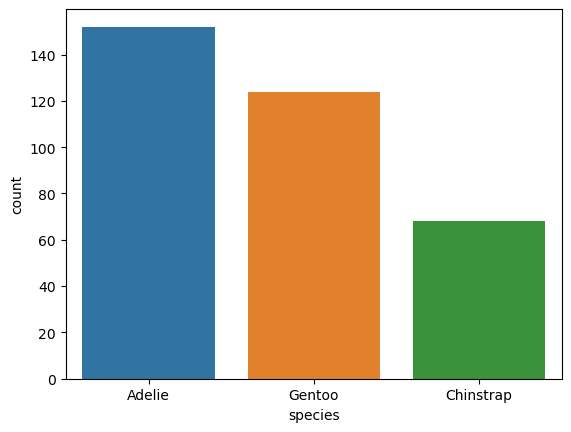

In [19]:
# Produce a bar plot for the count of species
sns.countplot(x = 'species', data = df)

In [26]:
## Summary stats for all columns in the data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [27]:
## Calculate the mean for bill length and bill depth
df[['bill_length_mm', 'bill_depth_mm']].mean()

bill_length_mm    43.92193
bill_depth_mm     17.15117
dtype: float64

In [29]:
## Do columns have NA?

df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [30]:
## how many NAs in each column
len(df) - df.count()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [31]:
## If we wanted/needed to Remove NAs we can uncomment and run this code
# But I'll leave them in for now

# df = df.dropna()

In [38]:
## Get the 25th, 50th, and 75th quantiles for bill length and bill depth on the Island Biscoe

df.loc[df['island'] == 'Biscoe', ['bill_length_mm', 'bill_depth_mm']].quantile([0.25, 0.5, 0.75])

,bill_length_mm,bill_depth_mm
0.25,42.0,14.5
0.50,45.8,15.5
0.75,48.7,17.0


<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

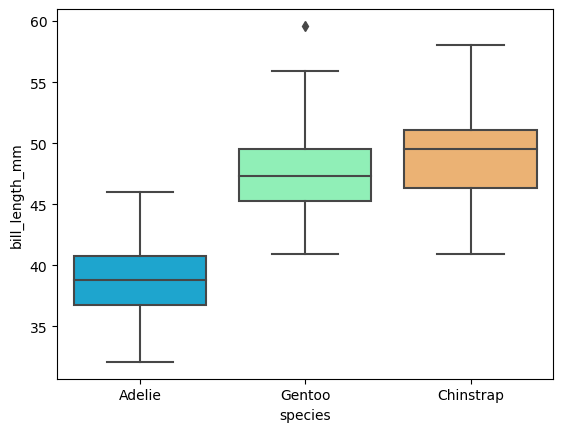

In [44]:
## Boxplot of bill length by species
sns.boxplot(x = 'species', y = 'bill_length_mm', data = df, orient = 'v', palette = 'rainbow')

<AxesSubplot:xlabel='bill_length_mm', ylabel='species'>

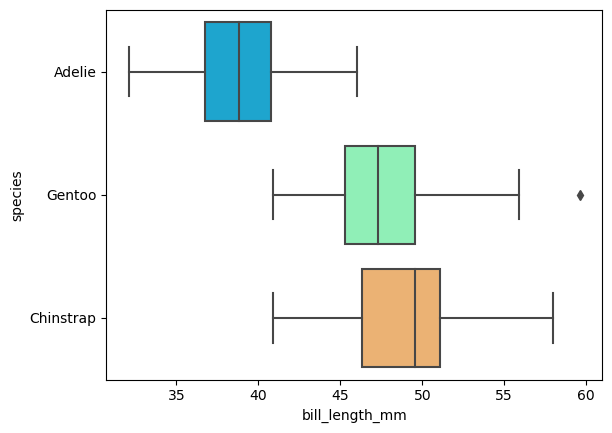

In [45]:
## Make the boxplot horizontal
sns.boxplot(x = 'bill_length_mm', y = 'species', data = df, orient = 'h', palette = 'rainbow')

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

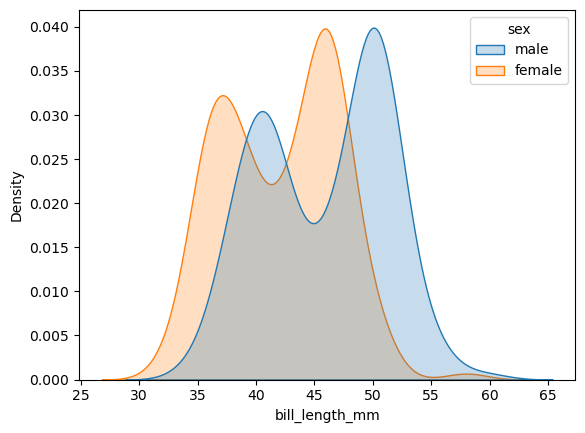

In [37]:
## Density plot of bill length grouped by sex
sns.kdeplot(df['bill_length_mm'], shade = True, hue = df['sex'])

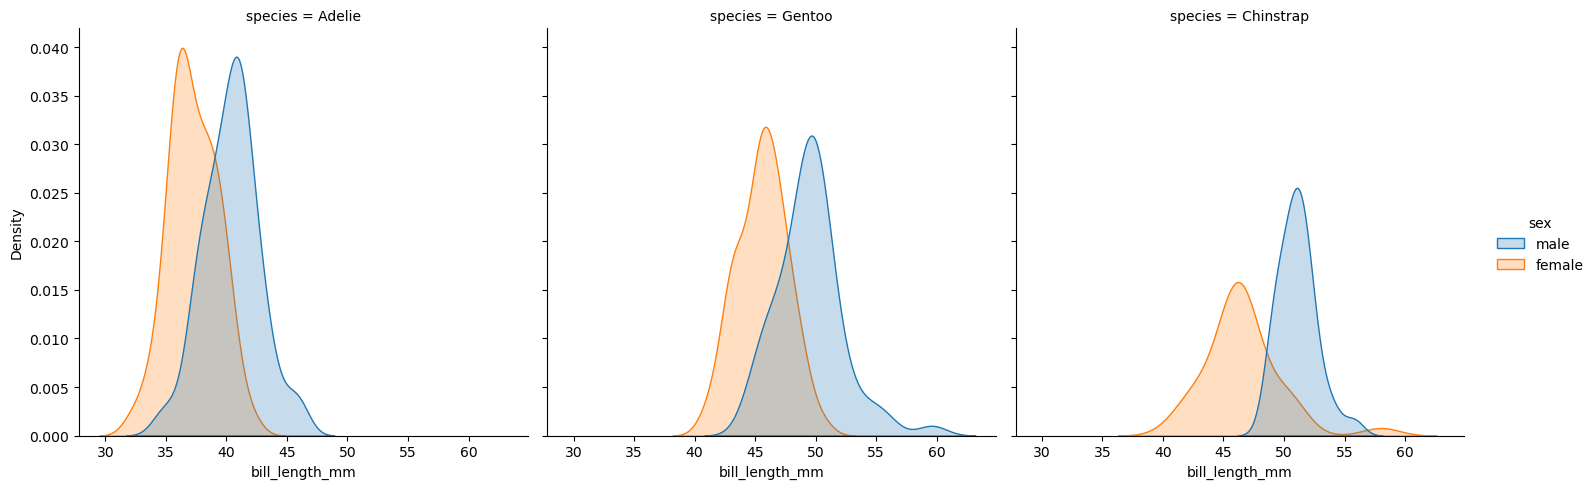

In [52]:
## Bill Length by Sex with Facet's for Species
sns.displot(x = 'bill_length_mm', 
            data = df,
            kind = 'kde',
            hue = 'sex',
            col = 'species', 
            fill = True)

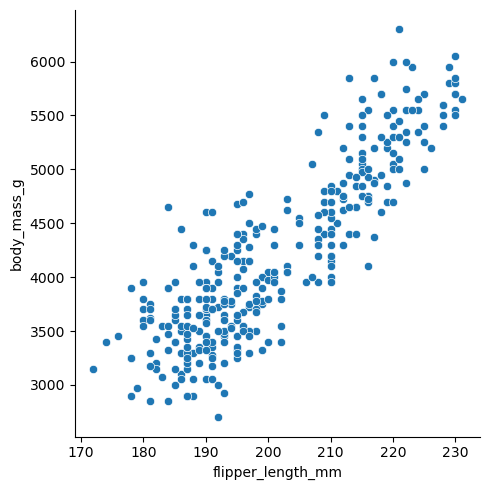

In [61]:
## scatter plot showing flipper length relative to body mass
sns.relplot(x = 'flipper_length_mm', y = 'body_mass_g', data = df)

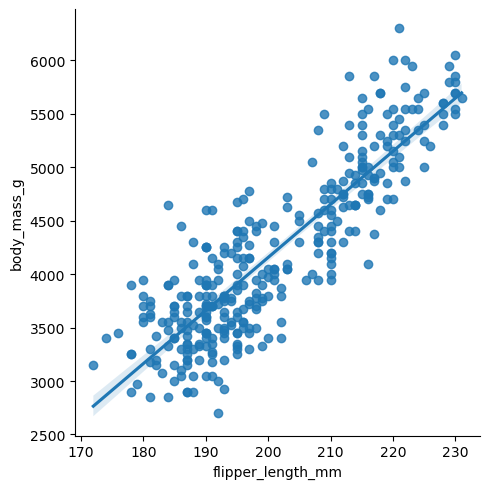

In [63]:
## scatter plot with regression line
sns.lmplot(x = 'flipper_length_mm', y = 'body_mass_g', data = df)

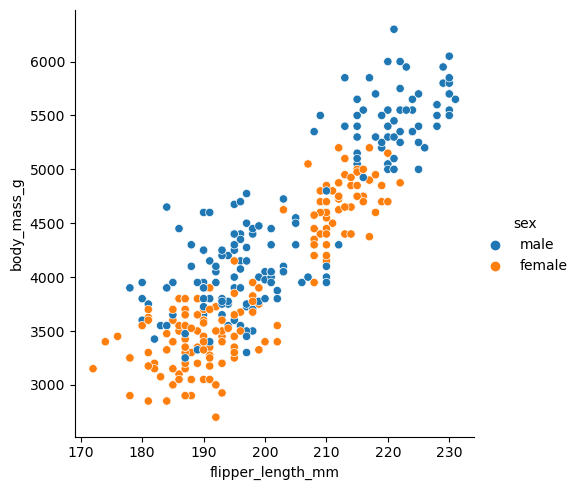

In [60]:
# scatter plot colored by sex
sns.relplot(x = 'flipper_length_mm', y = 'body_mass_g', data = df, hue = 'sex')

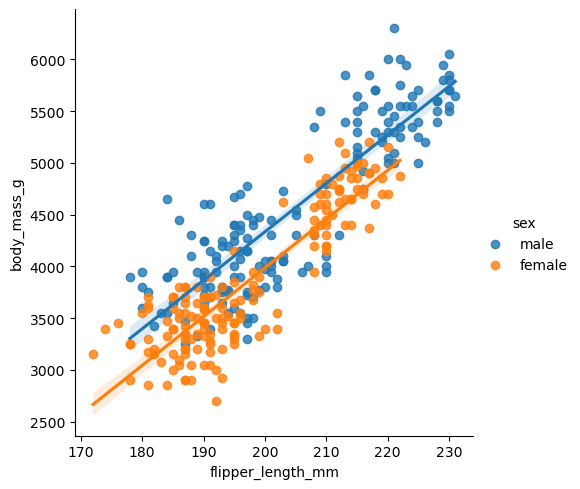

In [64]:
# scatter plot colored by sex with regression lines
sns.lmplot(x = 'flipper_length_mm', y = 'body_mass_g', data = df, hue = 'sex')

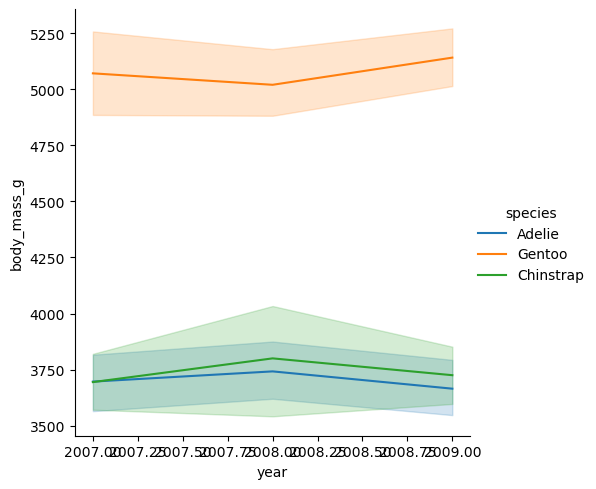

In [59]:
## Change in body mass across years by species
sns.relplot(x = 'year', y = 'body_mass_g', kind = 'line',
           hue = 'species', data = df)

## Group By Summarize

In `tidyverse` we often will summarize data by groups using the `group_by()` and `summarize()` functions piped together, `%>%,` following the data frame name.

In python we will use the `.groupby()` function and the `agg()` function to specify which types of data summaries we want. We will also reset the index following these two functions. Instead of pipes we use `.` to connect these functions together. Additionally, we wrap the entire statement in parentheses to ensure that python reads it altogether.

We will get the mean and standard deviation bill_length for each species.

In [66]:
## Mean and Standard Deviation of bill length for each Species
species_bill_length = (df
           .groupby('species')
           .agg(avg_bill_length = ('bill_length_mm', 'mean'),
               sd_bill_length = ('bill_length_mm', 'std')).round(1)
           .reset_index())


species_bill_length

,species,avg_bill_length,sd_bill_length
0,Adelie,38.8,2.7
1,Chinstrap,48.8,3.3
2,Gentoo,47.5,3.1


In [67]:
## Mean and Standard Deviation of bill length for each Species by Sex
species_bill_length_sex = (df
           .groupby(['species', 'sex'])
           .agg(avg_bill_length = ('bill_length_mm', 'mean'),
               sd_bill_length = ('bill_length_mm', 'std')).round(1)
           .reset_index())


species_bill_length_sex

,species,sex,avg_bill_length,sd_bill_length
0,Adelie,female,37.3,2.0
1,Adelie,male,40.4,2.3
2,Chinstrap,female,46.6,3.1
3,Chinstrap,male,51.1,1.6
4,Gentoo,female,45.6,2.1
5,Gentoo,male,49.5,2.7


## Group By Mutate

Aside from summarizing data, in `tidyverse` we often use `mutate()` to create a new column of data relative to our specified grouping variable.

In python, we can perform a similar action using the `transform()` function.

In [71]:
# add new column to the data frame that shows mean flipper length grouped by species

df['mean_flipper_length'] = df.groupby('species')['flipper_length_mm'].transform('mean')

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,mean_flipper_length
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,189.953642
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,189.953642
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,189.953642
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,189.953642
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,189.953642


### Using a lambda expression

If we have a variable that we are creating which is more involved than a simple summary statistic, we can write a lambda expression, which allows us to define the function explicitly. Here we will calcualte the z-score of flipper length within species group.

In [73]:
df['flipper_z'] = df.groupby('species')['flipper_length_mm'].transform(lambda x: (x - x.mean()) / x.std()).round(2)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,mean_flipper_length,flipper_z
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,189.953642,-1.37
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,189.953642,-0.60
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,189.953642,0.77
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,189.953642,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,189.953642,0.47
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,195.823529,1.57
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,195.823529,0.87
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,195.823529,-0.40
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,195.823529,1.99


### Using `assign`

We can do something similar using the `assign()` function.

In [74]:
## Add the mean and standard deviation of bill length for each species to new columns
df = df.assign(
    mean_val = df.groupby(["species"]).bill_length_mm.transform('mean'),
    sd_val = df.groupby(["species"]).bill_length_mm.transform('std'))

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,mean_flipper_length,flipper_z,mean_val,sd_val
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,189.953642,-1.37,38.791391,2.663405
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,189.953642,-0.60,38.791391,2.663405
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,189.953642,0.77,38.791391,2.663405
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,189.953642,NaN,38.791391,2.663405
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,189.953642,0.47,38.791391,2.663405


## ifelse / case_when

Another task we often have to do when cleaning data is to use `ifelse()` or `case_when()` to create categories for specific variables.

There are three islands (Biscoe, Dream, and Torgersen). Let's create a new variable that traforms them into Island1, Island2, and Island3, respectively.

### Defining a custom function

The first approach is to define a custom function and then `map()` it to the column of interest with a `lambda` expression.

In [89]:
## custom function
def islad_transform(island):
 if island == 'Biscoe':
  return 'Island1'
 if island == 'Dream':
  return 'Island2'
 if island == 'Torgersen':
  return 'Island3'

In [90]:
## apply the function to create a new column

df["island_code"] = df["island"].map(lambda x: islad_transform(x))
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,mean_flipper_length,flipper_z,mean_val,sd_val,island_code,island_code2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,189.953642,-1.37,38.791391,2.663405,Island3,Island3
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,189.953642,-0.60,38.791391,2.663405,Island3,Island3
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,189.953642,0.77,38.791391,2.663405,Island3,Island3
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,189.953642,NaN,38.791391,2.663405,Island3,Island3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,189.953642,0.47,38.791391,2.663405,Island3,Island3


### Using numpy

An alternative approach is to use the `where()` function from the `numpy` librarwy, which behaves similar to `case_when()` in `tidyverse`.

In [91]:
df['island_code2'] = np.where(df['island'] == 'Biscoe', 'Island1',
                        (np.where(df['island'] == 'Dream', 'Island2', 'Island3')))

In [92]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,mean_flipper_length,flipper_z,mean_val,sd_val,island_code,island_code2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,189.953642,-1.37,38.791391,2.663405,Island3,Island3
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,189.953642,-0.60,38.791391,2.663405,Island3,Island3
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,189.953642,0.77,38.791391,2.663405,Island3,Island3
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,189.953642,NaN,38.791391,2.663405,Island3,Island3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,189.953642,0.47,38.791391,2.663405,Island3,Island3


In [93]:
## Check our work with a crosstable
pd.crosstab(df['island_code'], df['island_code2'])

island_code2,Island1,Island2,Island3
island_code,,,
Island1,168,0,0
Island2,0,124,0
Island3,0,0,52


## Linear Regression

Finally, we can build a simple linear regression model using the `statsmodels` library.

In [94]:
import statsmodels.formula.api as smf

In [95]:
## fit a linear model
model = smf.ols('body_mass_g ~ flipper_length_mm + species + sex', data = df)
results = model.fit()

In [98]:
## review model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     534.0
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          3.37e-142
Time:                        21:17:54   Log-Likelihood:                -2364.4
No. Observations:                 333   AIC:                             4739.
Df Residuals:                     328   BIC:                             4758.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -365.8174    532.050     -0.688      0.492   -1412.479     680.844
species[T.Chinstrap]   -87.6345     46.347     -1.891      0.060    -178.810       3.541
species[T.Gentoo]      836.2600     85.185      9.817      0.000     668.681    1003.839
sex[T.male]            530.3811     37.810     14.027      0.000     456.000     604.762
flipper_length_mm       20.0249      2.846      7.037      0.000      14.427      25.623
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.556
Skew:                           0.094   Prob(JB):                        0.459
Kurtosis:                       2.723   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""